In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing the Dataset

The original CSV file does not include any kind of column names, so if we don't define them, the first observation will be taken as the column names. We use the information provided to create the names of the features, and we will use one-word names for each of them for easy access.

In [27]:
columns = ['CustID', 'Accept', 'Reward', 'Mailer', 'Income', 'Accounts', 'Protection', 'Rating', 'Cards', 'Homes', 'HHSize', 'HomeOwner', 'BalQ1', 'BalQ2', 'BalQ3', 'BalQ4', 'AvgBal']
data = pd.read_csv('creditcardmarketing.csv', names=columns)

### Dataset

The data set consists of information on 18,000 current bank customers in the study. These are the definitions of data points provided:

* CustID: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
* Accept: Did the customer accept (Yes) or reject (No) the offer. 
* Reward: The type of reward program offered for the card.
* Mailer: Letter or postcard.
* Income: Low, Medium or High.
* Accounts: How many non-credit-card accounts are held by the customer.
* Protection: Does the customer have overdraft protection on their checking account(s) (Yes or No).
* Rating: Credit Rating - Low, Medium or High.
* Cards: The number of credit cards held at the bank.
* Homes: The number of homes owned by the customer.
* HHSize: Number of individuals in the family.
* HomeOwner: Does the customer own their home? (Yes or No).
* BalQ_: Average account balance (across all accounts over time) for Q1, Q2, Q3 and Q4.
* AvgBal: Average balance for each quarter in the last year.

In [28]:
data.head()

,CustID,Accept,Reward,Mailer,Income,Accounts,Protection,Rating,Cards,Homes,HHSize,HomeOwner,BalQ1,BalQ2,BalQ3,BalQ4,AvgBal
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [29]:
data.reset_index(inplace = True)

In [30]:
data.drop(['CustID', 'index'], axis = 1, inplace = True)

In [31]:
data

,Accept,Reward,Mailer,Income,Accounts,Protection,Rating,Cards,Homes,HHSize,HomeOwner,BalQ1,BalQ2,BalQ3,BalQ4,AvgBal
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [32]:
data['Accept'].value_counts()

No     16977
Yes     1023
Name: Accept, dtype: int64

In [18]:
data['Reward'].value_counts()

Air Miles    6061
Cash Back    5999
Points       5940
Name: Reward, dtype: int64

In [19]:
data['Mailer'].value_counts()

Postcard    9147
Letter      8853
Name: Mailer, dtype: int64

In [20]:
data['Income'].value_counts()

Medium    9013
High      4526
Low       4461
Name: Income, dtype: int64

In [21]:
data['Accounts'].value_counts()

1    13692
2     4012
3      296
Name: Accounts, dtype: int64

In [22]:
data['Protection'].value_counts()

No     15322
Yes     2678
Name: Protection, dtype: int64

In [23]:
data['Rating'].value_counts()

High      6071
Medium    5972
Low       5957
Name: Rating, dtype: int64

In [24]:
data['Cards'].value_counts()

2    7944
1    6154
3    3387
4     515
Name: Cards, dtype: int64

In [25]:
data['Homes'].value_counts()

1    14523
2     3292
3      185
Name: Homes, dtype: int64

In [39]:
data['HomeOwner'].value_counts()

Yes    11655
No      6345
Name: HomeOwner, dtype: int64

In [26]:
data['HHSize'].value_counts()

3    5712
4    5543
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: HHSize, dtype: int64

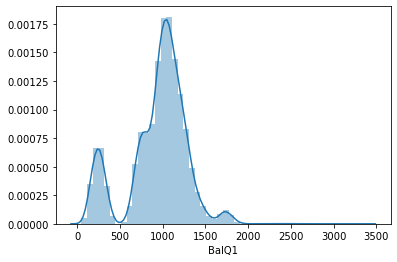

In [34]:
sns.distplot(data['BalQ1'])

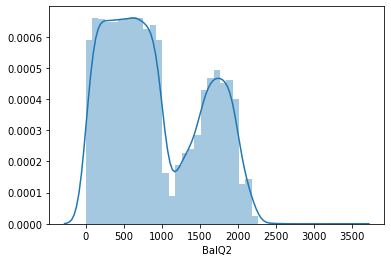

In [35]:
sns.distplot(data['BalQ2'])

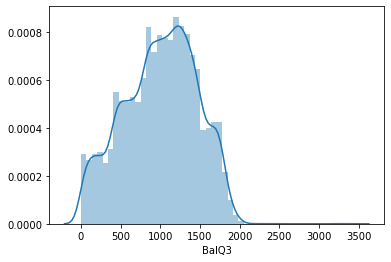

In [36]:
sns.distplot(data['BalQ3'])

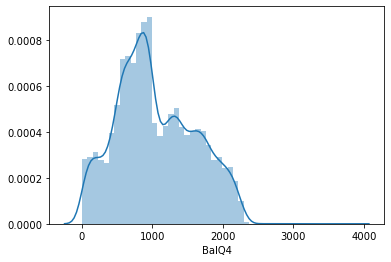

In [37]:
sns.distplot(data['BalQ4'])

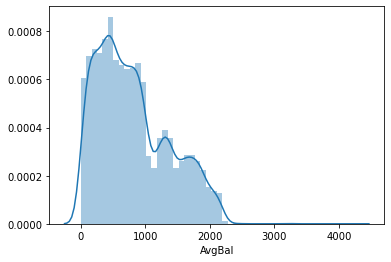

In [38]:
sns.distplot(data['AvgBal'])

In [41]:
accdf = data[data['Accept'] == 'Yes']

In [42]:
accdf['Income'].value_counts()

Medium    470
Low       388
High      165
Name: Income, dtype: int64

In [43]:
accdf['HomeOwner'].value_counts()

Yes    663
No     360
Name: HomeOwner, dtype: int64

In [45]:
accdf['Rating'].value_counts()

Low       633
Medium    271
High      119
Name: Rating, dtype: int64

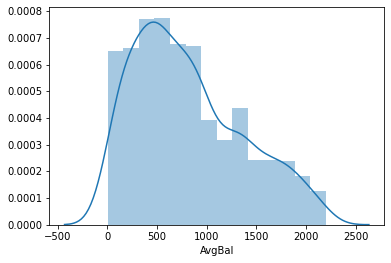

In [46]:
sns.distplot(accdf['AvgBal'])

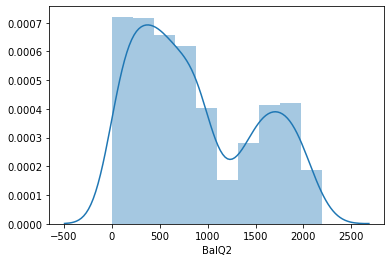

In [47]:
sns.distplot(accdf['BalQ2'])